# Interpolating chemical equilibrium abundances

The atmospheric composition is determined by its elemental composition and the chemcical reactions that link these elements and chemical reactant species. In the atmosphere of an exoplanet, which is inherently 3-d and dynamic, mixing and advection processes complicate this picture, because the chemical abundances inferred from spectra are not necessarily representative of the pressures and temperatures probed locally by the observation. In addition, also the radiation field of the host star may influence the abundance and opacity structure of the atmosphere, by dissociating or ionizing chemical species or forming photochemical hazes. In this picture, using chemical equilibrium abundances, which means the steady state chemical composition of the atmosphere when treating its layers as isolated and independent (no advection/mixing/photochemistry), appears unwise.

Yet, calculating chemical equilibrium abundances may still serve as a useful starting point for initializing abundances in planetary atmospheres. In certain conditions, for example for planets hot enough such that mixing is negligible, chemical equilibrium abundances can even be sufficient to accurately describe the abundances in the atmospheric region probed by observations.

Here we show how to use our ``poor_mans_nonequ_chem`` subpackage. This package interpolates the abundances of the most important species from a big chemical equilibrium table as a function of pressure, temperature, metallicity [Fe/H] (where [Fe/H]=0 is solar) and cabon-to-oxygen number ratio (C/O). A C/O $\sim 0.55$ is the solar value, see, for example, [Asplund et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009ARA%26A..47..481A/abstract).

<div class="alert alert-info">

**poor_mans_nonequ_chem() also contains a simple quenching implementation**. This means that a quench pressure can be specified above which the abundances of H$_2$O, CH$_4$ and CO are taken to be constant, following the reasoning in, for example, [Zahnle & Marley (2014)](https://ui.adsabs.harvard.edu/abs/2014ApJ...797...41Z/abstract).

</div>

The chemical grid has been calculated with easyCHEM, which is our self-written Gibbs free energy minimizer that is described in [Mollière et al. 2017](https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..10M/abstract), and essentially a CEA clone, see [Gordon & McBride (1994)](https://ntrs.nasa.gov/citations/19950013764). easyCHEM has been benchmarked as the chemical equilibrium tool of petitCODE in [Baudino et al. (2017)](https://ui.adsabs.harvard.edu/abs/2017ApJ...850..150B/abstract). The grid dimensions are $T \in [60, 4000]~{\rm K}$, with 100 equidistant temperature points, $P \in [10^{-8}, 1000]~{\rm bar}$, with 100 pressure points spaced equidistantly in log space,  ${\rm C/O} \in [0.1, 1.6]$, with 20 equidistant points, and ${\rm [Fe/H]} \in [-2,3]$, with 40 equidistant points. C/O is varied by varing the oxygen abundance, once the total elemental composition has been set by [Fe/H]. The total list of reactant species included was H, H$_2$, He, O, C, N, Mg, Si, Fe, S, AL, Ca, Na, Ni, P, K, Ti, CO, OH, SH, N$_2$, O$_2$, SiO, TiO, SiS, H$_2$O, C$_2$, CH, CN, CS, SiC, NH, SiH, NO, SN, SiN, SO, S$_2$, C$_2$H, HCN, C$_2$H$_2$,acetylene, CH$_4$, ALH, ALOH, AL$_2$O, CaOH, MgH, Mg, OH, PH$_3$, CO$_2$, TiO$_2$, Si$_2$C, SiO$_2$, FeO, NH$_2$, NH$_3$, CH$_2$, CH$_3$, H$_2$S, VO, VO$_2$, NaCL, KCL, e-, H+, H-, Na+, K+, PH$_2$, P$_2$, PS, PO, P$_4$O$_6$, PH, V, FeH, VO(c), VO(L), MgSiO$_3$(c), SiC(c), Fe(c), Na$_2$S(c), KCL(c), Fe(L), SiC(L), MgSiO$_3$(L), H$_2$O(L), H$_2$O(c), TiO(c), TiO(L), TiO$_2$(c), TiO$_2$(L), H$_3$PO$_4$(c), H$_3$PO$_4$(L), where (c) stands for solid and (L) for liquid species. To conserve space only the mass fractions of the following species are tabulated for use in ``poor_mans_nonequ_chem``: H$_2$, He, CO, H$_2$O, HCN, C$_2$H$_2$,acetylene, CH$_4$, PH$_3$, CO$_2$, NH$_3$, H$_2$S, VO, TiO, Na, K, SiO, e-, H-, H, FeH, MMW, nabla_ad. MMW denotes the mean molcular weight in the atmosphere, in units of amu. nabla_ad is the moist adiabatic lapse rate $\nabla_{\rm ad} = (\partial {\rm ln}T/\partial {\rm ln}P)_{\rm ad}$, determined as described in [Mollière et al. (2020)](https://arxiv.org/abs/2006.09394).

<div class="alert alert-warning">

**Abundances in poor_mans_nonequ_chem:** abundances in poor_mans_nonequ_chem() are in units of **mass fractions**, not number fractions (aka volume mixing ratio, VMR). You can convert between mass fractions and VMRs by using
\begin{equation}
X_i = \frac{\mu_i}{\mu}n_i,
\end{equation}
where $X_i$ is the mass fraction of species $i$, $\mu_i$ the mass of a single molecule/atom/ion/... of species $i$, $\mu$ is the atmospheric mean molecular weight, and $n_i$ is the VMR of species $i$.
</div>

## Example

Here we will give some examples for how to interpolate chemical abundances using ``poor_mans_nonequ_chem``. The installation of it is described immediately below.

We begin by loading the relevant packages:

In [1]:
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize'] = (10, 6)

from petitRADTRANS.poor_mans_nonequ_chem import interpol_abundances
from petitRADTRANS import nat_cst as nc

Next, we define an atmospheric temperature and abundance structure, following an example similar to what is shown in ["Getting Started"](getting_started.html).

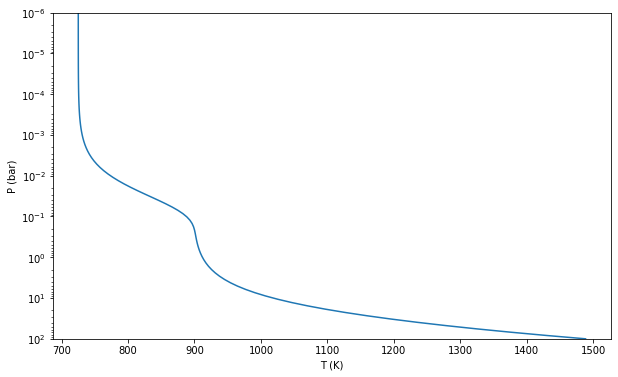

<Figure size 720x432 with 0 Axes>

In [2]:
pressures = np.logspace(-6, 2, 100)
gravity = 1e1**2.45
kappa_IR = 0.01
gamma = 0.4
T_int = 200.
T_equ = 800.

temperature = nc.guillot_global(pressures, kappa_IR, gamma, gravity, T_int, T_equ)

plt.plot(temperature, pressures)
plt.yscale('log')
plt.ylim([1e2, 1e-6])
plt.xlabel('T (K)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()

No we calculate the abundances. Note that the input parameters temperature, pressure, [Fe/H] and C/O are all arrays, and must be defined at every layer, but usually C/O and [Fe/H] are not vertically varying in the atmosphere. Here we chose a solar metallicity and C/O.

In [3]:
COs = 0.55 * np.ones_like(pressures)
FeHs = 0. * np.ones_like(pressures)
    
mass_fractions = interpol_abundances(COs, \
            FeHs, \
            temperature, \
            pressures)

Lets plot the abundances:

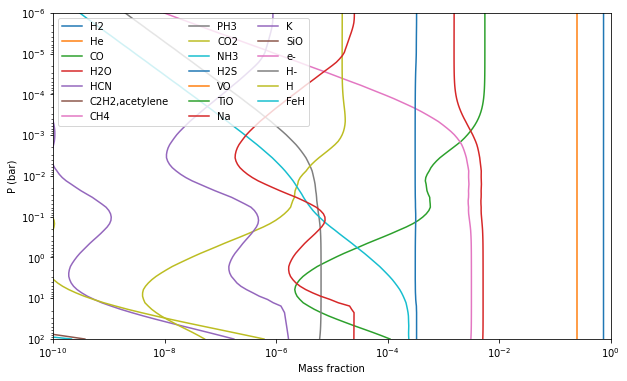

<Figure size 720x432 with 0 Axes>

In [4]:
plt.yscale('log')
plt.xscale('log')
plt.ylim([100,1e-6])
plt.xlim([1e-10, 1])

for species in mass_fractions.keys():
    if species not in ['MMW', 'nabla_ad']:
        plt.plot(mass_fractions[species], pressures, label = species)
        
plt.legend(loc='best', ncol=3)
plt.xlabel('Mass fraction')
plt.ylabel('P (bar)')
plt.show()
plt.clf()

Also the MMW and adiabatic temperature gradient are accessible, which turns out to be vertically constant for this atmosphere:

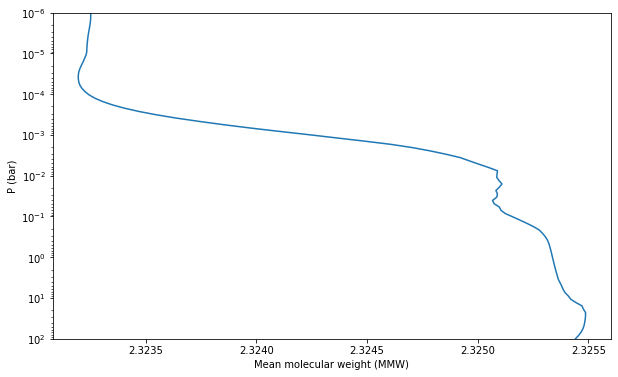

<Figure size 720x432 with 0 Axes>

In [5]:
plt.yscale('log')
plt.ylim([100,1e-6])

plt.plot(mass_fractions['MMW'], pressures, label = species)
        
plt.xlabel('Mean molecular weight (MMW)')
plt.ylabel('P (bar)')
plt.show()
plt.clf()

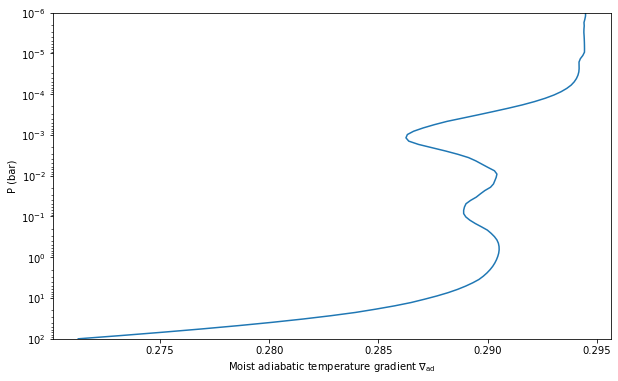

<Figure size 720x432 with 0 Axes>

In [6]:
plt.yscale('log')
plt.ylim([100,1e-6])

plt.plot(mass_fractions['nabla_ad'], pressures, label = species)
        
plt.xlabel(r'Moist adiabatic temperature gradient $\nabla_{\rm ad}$')
plt.ylabel('P (bar)')
plt.show()
plt.clf()

As a test, we can also plot abundances at a given pressure, temperature, C/O, as a function of metallicity:

In [7]:
FeHs = np.linspace(-2, 3, 100)
p_const = np.ones_like(FeHs)*1e-1
t_const = np.ones_like(FeHs)*900.
COs = 0.55 * np.ones_like(FeHs)
    
mass_fractions = interpol_abundances(COs, \
            FeHs, \
            t_const, \
            p_const)

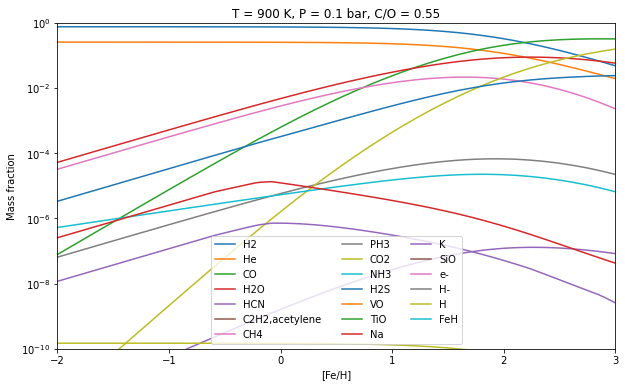

<Figure size 720x432 with 0 Axes>

In [8]:
plt.yscale('log')
plt.ylim([1e-10, 1])
plt.xlim([-2, 3])

for species in mass_fractions.keys():
    if species not in ['MMW', 'nabla_ad']:
        plt.plot(FeHs, mass_fractions[species], label = species)
        
plt.legend(loc='best', ncol=3)
plt.ylabel('Mass fraction')
plt.xlabel('[Fe/H]')
plt.title('T = 900 K, P = 0.1 bar, C/O = 0.55')
plt.show()
plt.clf()

This is the mean molecular weight as a function of metallicity:

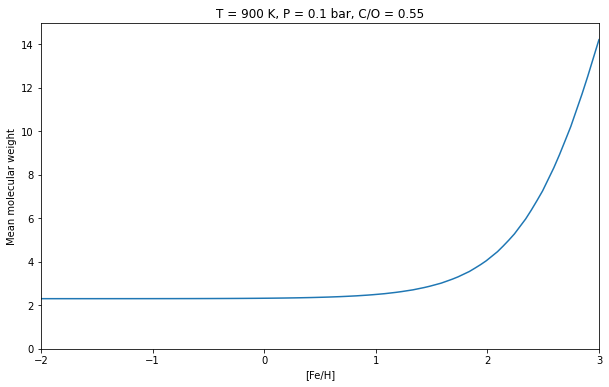

<Figure size 720x432 with 0 Axes>

In [9]:
plt.xlim([-2, 3])
plt.ylim([0, 15])

plt.plot(FeHs, mass_fractions['MMW'])

plt.ylabel('Mean molecular weight')
plt.xlabel('[Fe/H]')
plt.title('T = 900 K, P = 0.1 bar, C/O = 0.55')
plt.show()
plt.clf()

Here the mass fractions as a function of the C/O ratio, at solar metallicity:

In [10]:
COs = np.linspace(0.1, 1.6, 100)
FeHs = 0. * np.ones_like(COs)
p_const = np.ones_like(COs)*1e-1
t_const = np.ones_like(COs)*1400.
    
mass_fractions = interpol_abundances(COs, \
            FeHs, \
            t_const, \
            p_const)

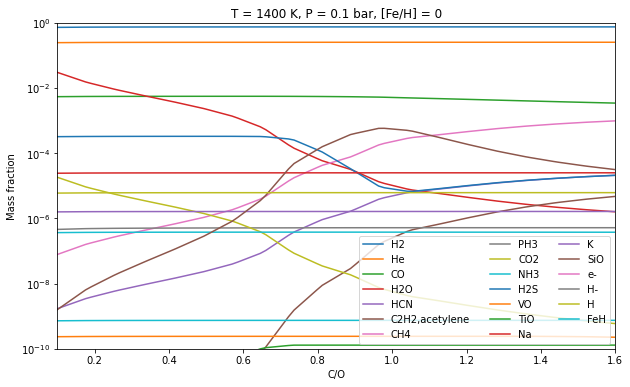

<Figure size 720x432 with 0 Axes>

In [11]:
plt.yscale('log')
plt.ylim([1e-10, 1])
plt.xlim([0.1, 1.6])

for species in mass_fractions.keys():
    if species not in ['MMW', 'nabla_ad']:
        plt.plot(COs, mass_fractions[species], label = species)
        
plt.legend(loc='lower right', ncol=3)
plt.ylabel('Mass fraction')
plt.xlabel('C/O')
plt.title('T = 1400 K, P = 0.1 bar, [Fe/H] = 0')
plt.show()
plt.clf()

Finally, we show an example with quenching here, assuming that the CH$_4$, H$_2$O and CO abundances are constant in for pressures below 1 bar. We will use the temperature structure from above again.

In [12]:
# Nominal case:
COs = 0.55 * np.ones_like(pressures)
FeHs = 0. * np.ones_like(pressures)
    
mass_fractions = interpol_abundances(COs, \
            FeHs, \
            temperature, \
            pressures)

# Quenching case:
mass_fractions_quench = interpol_abundances(COs, \
            FeHs, \
            temperature, \
            pressures, \
            Pquench_carbon = 1.)

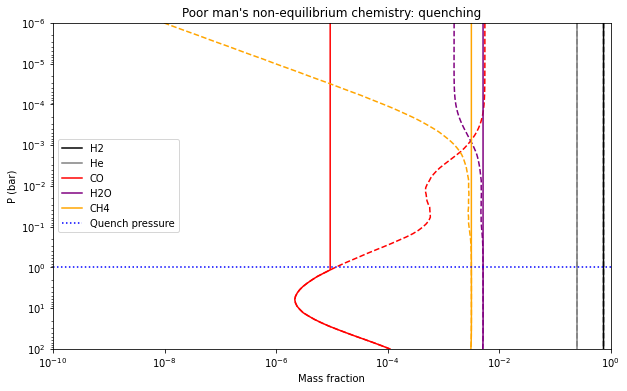

<Figure size 720x432 with 0 Axes>

In [13]:
plt.yscale('log')
plt.xscale('log')
plt.ylim([100,1e-6])
plt.xlim([1e-10, 1])

plt.plot(mass_fractions['H2'], pressures, linestyle = '--', color = 'black')
plt.plot(mass_fractions_quench['H2'], pressures, label = 'H2', linestyle = '-', color = 'black')
plt.plot(mass_fractions['He'], pressures, linestyle = '--', color = 'gray')
plt.plot(mass_fractions_quench['He'], pressures, label = 'He', linestyle = '-', color = 'gray')
plt.plot(mass_fractions['CO'], pressures, linestyle = '--', color = 'red')
plt.plot(mass_fractions_quench['CO'], pressures, label = 'CO', linestyle = '-', color = 'red')
plt.plot(mass_fractions['H2O'], pressures, linestyle = '--', color = 'purple')
plt.plot(mass_fractions_quench['H2O'], pressures, label = 'H2O', linestyle = '-', color = 'purple')
plt.plot(mass_fractions['CH4'], pressures, linestyle = '--', color = 'orange')
plt.plot(mass_fractions_quench['CH4'], pressures, label = 'CH4', linestyle = '-', color = 'orange')

plt.axhline(1., color = 'blue', linestyle = ':', label = 'Quench pressure')

plt.legend(loc='best', ncol=1)
plt.xlabel('Mass fraction')
plt.ylabel('P (bar)')
plt.title("Poor man's non-equilibrium chemistry: quenching")
plt.show()
plt.clf()